In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = [json.loads(line) for line in open("./data/data.jsonl", 'r', encoding='utf-8')]
df = pd.DataFrame(data)

## Null Non-Null Summary DF

In [3]:
nulls_dict = {'feature': list(df.columns)
              , 'nulls': df.isna().sum().values
              , 'non_nulls': df.notnull().sum().values
             }
nulls_df = pd.DataFrame(nulls_dict)
nulls_df

,feature,nulls,non_nulls
0,created_at,0,140337
1,id,0,140337
2,id_str,0,140337
3,full_text,0,140337
4,truncated,0,140337
5,display_text_range,0,140337
6,entities,0,140337
7,source,0,140337
8,in_reply_to_status_id,121225,19112
9,in_reply_to_status_id_str,121225,19112


## EDA: Explore each feature for importnaces (* means use this feature)

### created_at

In [4]:
type(df.created_at.iloc[0])

str

In [5]:
# Seems like created_at is a timestamp column, create on with pd.to_datetime()
df['datetime'] = pd.to_datetime(df.created_at)

In [6]:
# column has no nulls
df.created_at.isna().sum()

0

### *id and id_str

In [7]:
# These two columns are the same, just one with numbers the other string

In [8]:
df.id.iloc[0]

1311093385688735744

In [9]:
df.id_str.iloc[0]

'1311093385688735744'

In [10]:
# columns have no nulls
print(df.id.isna().sum())
print(df.id_str.isna().sum())

0
0


### *full_text

In [11]:
df.full_text[0]

'Biden a professional debater??  Hardly!! More like a professional liar! https://t.co/cQuxzexXYt'

In [12]:
# colum has no nulls
df.full_text.isna().sum()

0

### truncated

In [13]:
# boolean for truncated message
df.truncated.iloc[0]

False

In [14]:
df.truncated.value_counts()

False    140337
Name: truncated, dtype: int64

In [15]:
# truncated has not nulls
df.truncated.isna().sum()

0

### *display_text_range

In [16]:
# length of text
df.display_text_range.iloc[0]

[0, 71]

In [17]:
# display_text_range has no nulls
df.display_text_range.isna().sum()

0

### *entities

In [18]:
# dictionary of user entities
df.entities.iloc[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/cQuxzexXYt',
   'expanded_url': 'https://twitter.com/IngrahamAngle/status/1311081374510710784',
   'display_url': 'twitter.com/IngrahamAngle/…',
   'indices': [72, 95]}]}

In [19]:
# entities has no nulls
df.entities.isna().sum()

0

### *source

In [20]:
# source, mobile or web
df.source.iloc[3]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [21]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      62080
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    38641
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 29655
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        8046
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       459
                                                                                        ...  
<a href="https://pragmaticcode.com/linky/" rel="nofollow">Linky for iOS</a>                 1
<a href="https://missinglettr.com" rel="nofollow">Missinglettr</a>                          1
<a href="https://go-shopal.herokuapp.com" rel="nofollow">RedianDevBot</a>                   1
<a href="https://app.sendible.com" rel="nofollow">Sendible</a>                              1
<a href="http://www.akidthaine.com" rel="nofollow">Clickclic

In [22]:
# there are 311 types of Twitter sources
len(df.source.value_counts())

311

In [23]:
# source has no nulls
df.source.isna().sum()

0

### in_reply_to_status_id  and  in_reply_to_status_id_str

In [24]:
# Not sure what this is! a status id?
df.in_reply_to_status_id[df.in_reply_to_status_id.notnull()]

11        1.311090e+18
17        1.311092e+18
24        1.311074e+18
28        1.311034e+18
35        1.311088e+18
              ...     
140303    1.312158e+18
140307    1.312180e+18
140311    1.312052e+18
140324    1.312158e+18
140333    1.312111e+18
Name: in_reply_to_status_id, Length: 19112, dtype: float64

In [25]:
df.in_reply_to_status_id.iloc[11]

1.3110897652576256e+18

In [26]:
type(df.in_reply_to_status_id.iloc[11])

numpy.float64

In [27]:
# string version of in_reply_to_status_id
df.in_reply_to_status_id_str.iloc[11]

'1311089765257625600'

In [28]:
len(df.in_reply_to_status_id_str.iloc[11])

19

In [29]:
# in_replay_to_status_id has 121,225 null entries
df.in_reply_to_status_id.isna().sum()

121225

In [30]:
# in_replay_to_status_id has 19,112 non-null entries
df.in_reply_to_status_id.notnull().sum()

19112

### in_reply_to_user_id  and  in_reply_to_user_id_str

In [31]:
# not sure what this is? in reply to user id?
df.in_reply_to_user_id[df.in_reply_to_user_id.notnull()]

11        1.850261e+08
17        7.807069e+07
24        2.353606e+09
28        2.929293e+08
35        9.364382e+17
              ...     
140307    1.247764e+18
140311    2.541519e+08
140324    2.507388e+07
140333    2.853462e+09
140334    1.367531e+06
Name: in_reply_to_user_id, Length: 20181, dtype: float64

In [32]:
df.in_reply_to_user_id.iloc[11]

185026121.0

In [33]:
df.in_reply_to_user_id_str.iloc[11]

'185026121'

In [34]:
# in_replay_to_status_id has 120,156 null entries
df.in_reply_to_user_id.isna().sum()

120156

In [35]:
# in_replay_to_status_id has 20,181 non-null entries
df.in_reply_to_user_id.notnull().sum()

20181

### in_reply_to_screen_name

In [36]:
# User replied to...?
df.in_reply_to_screen_name[df.in_reply_to_screen_name.notnull()]

11             laggerific
17             rodala2904
24          GOPChairwoman
28          charliekirk11
35        PandaGetsHangry
               ...       
140307       maddyhossler
140311       brad_dickson
140324    realDonaldTrump
140333     ScottAdamsSays
140334            FoxNews
Name: in_reply_to_screen_name, Length: 20181, dtype: object

In [37]:
df.in_reply_to_screen_name.iloc[11]

'laggerific'

In [38]:
# in_replay_to_status_id has 120,156 null entries, same as in_reply_to_user_id
df.in_reply_to_screen_name.isna().sum()

120156

In [39]:
# in_replay_to_status_id has 20,181 non-null entries, same as in_reply_to_user_id
df.in_reply_to_screen_name.notnull().sum()

20181

### *user

In [40]:
# user entries are rich in user information, may have to unpack these features for further analysis...
df.user.iloc[0]

{'id': 117904481,
 'id_str': '117904481',
 'name': 'SharonS',
 'screen_name': 'sfshores53',
 'location': 'America ',
 'description': 'Conservative/#MAGA/ #WWG1WGA /MbrNRA/#Trump2020/Pro-Life/Pro-2nd Amend/parler@SharonA53/ NO DMs-/Patriots-will follow all/will unfollow those who do not follow',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 4065,
 'friends_count': 4998,
 'listed_count': 16,
 'created_at': 'Sat Feb 27 00:36:23 +0000 2010',
 'favourites_count': 3659,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 6156,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '0099B9',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme4/bg.gif',
 'profile_background_tile': False,
 'profile_ima

In [41]:
# user has not nulls
df.user.isna().sum()

0

### geo

In [42]:
# geo feature may be dropped 
df.geo[df.geo.notnull()]

30188      {'type': 'Point', 'coordinates': [33.0, -83.5]}
111464    {'type': 'Point', 'coordinates': [40.0, -100.0]}
Name: geo, dtype: object

In [43]:
# geo has 2 non-nulls
df.geo.notnull().sum()

2

In [44]:
# geo has 140,335 nulls
df.geo.isna().sum()

140335

### coordinates

In [45]:
# coordinates feature may be dropped 
df.coordinates[df.coordinates.notnull()]

30188      {'type': 'Point', 'coordinates': [-83.5, 33.0]}
111464    {'type': 'Point', 'coordinates': [-100.0, 40.0]}
Name: coordinates, dtype: object

In [46]:
# coordinates has 2 non-nulls
df.coordinates.notnull().sum()

2

In [47]:
# coordinates has 140,335 nulls
df.coordinates.isna().sum()

140335

### *place (mabye for an alternate model)

In [48]:
# place feature may be dropped 
df.place[df.place.notnull()]

127       {'id': '5c937363480a2c19', 'url': 'https://api...
291       {'id': 'df7fd3a3b9eff7ee', 'url': 'https://api...
350       {'id': 'c84ab04b59413e2f', 'url': 'https://api...
448       {'id': '4fa26750e4d5620c', 'url': 'https://api...
478       {'id': '0fc34b11eb546001', 'url': 'https://api...
                                ...                        
139597    {'id': '11148050237800f2', 'url': 'https://api...
139701    {'id': '00c39537733fa112', 'url': 'https://api...
139768    {'id': 'e8ad2641c1cb666c', 'url': 'https://api...
140168    {'id': '4ccacb29ffb3b3df', 'url': 'https://api...
140246    {'id': '00054d3a0a8df14e', 'url': 'https://api...
Name: place, Length: 778, dtype: object

In [49]:
df.place.iloc[127]

{'id': '5c937363480a2c19',
 'url': 'https://api.twitter.com/1.1/geo/id/5c937363480a2c19.json',
 'place_type': 'city',
 'name': 'Cedar Park',
 'full_name': 'Cedar Park, TX',
 'country_code': 'US',
 'country': 'United States',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-97.8816996, 30.4555355],
    [-97.74559, 30.4555355],
    [-97.74559, 30.556381],
    [-97.8816996, 30.556381]]]},
 'attributes': {}}

In [50]:
# place has 778 non-nulls
df.place.notnull().sum()

778

In [51]:
# place has 139,559 nulls
df.place.isna().sum()

139559

### contributors

In [52]:
# contributors have all null values
df.contributors.value_counts()

Series([], Name: contributors, dtype: int64)

In [53]:
df.contributors

0         None
1         None
2         None
3         None
4         None
          ... 
140332    None
140333    None
140334    None
140335    None
140336    None
Name: contributors, Length: 140337, dtype: object

In [54]:
# contributors doe not have any notnulls
df.contributors.notnull().sum()

0

In [55]:
# contributors have 140337 nulls, or the entire feature
df.contributors.isna().sum()

140337

### *is_quote_status or re-tweet True/False

In [56]:
df.is_quote_status.iloc[0]

True

In [57]:
df.is_quote_status.value_counts()

False    115865
True      24472
Name: is_quote_status, dtype: int64

In [58]:
# is_quote_status has 140337 not nulls or all not nulls
df.is_quote_status.notnull().sum()

140337

In [59]:
# is_quote has no nulls
df.is_quote_status.isna().sum()

0

### quoted_status_id  and  quoted_status_id_str

In [60]:
df.quoted_status_id[df.quoted_status_id.notnull()]

0         1.311081e+18
1         1.311068e+18
3         1.311075e+18
13        1.311085e+18
20        1.311023e+18
              ...     
140283    1.312158e+18
140287    1.312150e+18
140290    7.826734e+17
140319    1.311845e+18
140334    1.312052e+18
Name: quoted_status_id, Length: 24453, dtype: float64

In [61]:
df.quoted_status_id.iloc[0]

1.3110813745107108e+18

In [62]:
df.quoted_status_id_str.iloc[0]

'1311081374510710784'

In [63]:
# quoted_status_id has 24,453 not null values
df.quoted_status_id.notnull().sum()

24453

In [64]:
# quoted_status_id_str has 24,453 not null values
df.quoted_status_id_str.notnull().sum()

24453

In [65]:
# quoted_status_id has 115,884 null values
df.quoted_status_id.isna().sum()

115884

In [66]:
# quoted_status_id_str has 115,884 not null values, same as quoted_status_id
df.quoted_status_id_str.isna().sum()

115884

### quoted_status_permalink

In [67]:
df.quoted_status_permalink[df.quoted_status_permalink.notnull()]

0         {'url': 'https://t.co/cQuxzexXYt', 'expanded':...
1         {'url': 'https://t.co/GOhLaDJLeN', 'expanded':...
3         {'url': 'https://t.co/CdP89boyMD', 'expanded':...
13        {'url': 'https://t.co/UsGTooBCyt', 'expanded':...
20        {'url': 'https://t.co/3IQBeRoNBs', 'expanded':...
                                ...                        
140283    {'url': 'https://t.co/LuDs229jRB', 'expanded':...
140287    {'url': 'https://t.co/TiL8NKvVw5', 'expanded':...
140290    {'url': 'https://t.co/mBvs82nzSu', 'expanded':...
140319    {'url': 'https://t.co/Zb9V44ui86', 'expanded':...
140334    {'url': 'https://t.co/ny6550SLAr', 'expanded':...
Name: quoted_status_permalink, Length: 24452, dtype: object

In [68]:
df.quoted_status_permalink.iloc[0]

{'url': 'https://t.co/cQuxzexXYt',
 'expanded': 'https://twitter.com/IngrahamAngle/status/1311081374510710784',
 'display': 'twitter.com/IngrahamAngle/…'}

In [69]:
# quoted_status_permalink has 24,452 not null entries
df.quoted_status_permalink.notnull().sum()

24452

In [70]:
# quoted_status_permalink has 115,885 null entries
df.quoted_status_permalink.isna().sum()

115885

### *quoted_status (may want to use for separate modeling)

In [71]:
df.quoted_status[df.quoted_status.notnull()]

0         {'created_at': 'Tue Sep 29 23:12:13 +0000 2020...
48        {'created_at': 'Tue Sep 29 19:22:28 +0000 2020...
79        {'created_at': 'Tue Sep 29 23:27:01 +0000 2020...
120       {'created_at': 'Tue Sep 29 14:12:20 +0000 2020...
159       {'created_at': 'Tue Sep 29 23:25:00 +0000 2020...
                                ...                        
140215    {'created_at': 'Fri Oct 02 22:03:12 +0000 2020...
140247    {'created_at': 'Fri Oct 02 22:05:49 +0000 2020...
140277    {'created_at': 'Fri Oct 02 08:16:34 +0000 2020...
140283    {'created_at': 'Fri Oct 02 22:31:56 +0000 2020...
140319    {'created_at': 'Fri Oct 02 01:44:37 +0000 2020...
Name: quoted_status, Length: 7572, dtype: object

In [72]:
df.quoted_status.iloc[0]

{'created_at': 'Tue Sep 29 23:12:13 +0000 2020',
 'id': 1311081374510710784,
 'id_str': '1311081374510710784',
 'full_text': 'On Biden tonight—\n1He’s a professional debater – it’s the closest thing he’s ever had to a real job.\n2.  This is a Biden’s 3rd time running for President.  \n3Whatever he does, the press will declare him the winner',
 'truncated': False,
 'display_text_range': [0, 213],
 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 50769180,
  'id_str': '50769180',
  'name': 'Laura Ingraham',
  'screen_name': 'IngrahamAngle',
  'location': 'DC',
  'description': 'Mom, author, host, The Ingraham Angle, 10p ET @FoxNews. Retweets do not = Endorsements',
  'url': 'https://t.

In [73]:
# quoted_status has 7,572 non-null entries
df.quoted_status.notnull().sum()

7572

In [74]:
# quoted_status has 132,765 null entries
df.quoted_status.isna().sum()

132765

### *retweet_count

In [75]:
df.retweet_count.iloc[0]

0

In [76]:
df.retweet_count.median()

859.0

In [77]:
df.retweet_count.mean()

21028.81549413198

In [78]:
df.retweet_count.std()

66438.94603761076

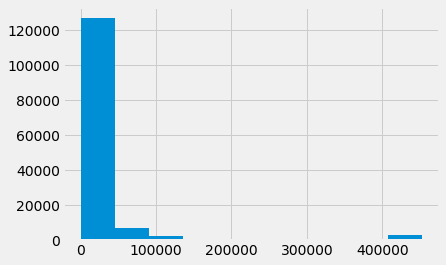

In [79]:
plt.hist(df.retweet_count);

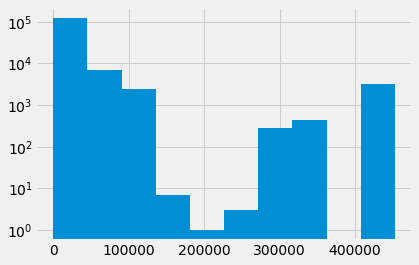

In [80]:
plt.hist(df.retweet_count, log=True);

In [81]:
# retweet_count has 140,337 non-null entries
df.retweet_count.notnull().sum()

140337

In [82]:
# retweet_count has 0 null entries
df.retweet_count.isna().sum()

0

### *favorite_count

In [83]:
df.favorite_count.iloc[0]

0

In [84]:
df.favorite_count.value_counts()

0      128007
1        5656
2        2176
3        1070
4         643
        ...  
565         1
437         1
181         1
692         1
767         1
Name: favorite_count, Length: 305, dtype: int64

In [85]:
df.favorite_count.median()

0.0

In [86]:
df.favorite_count.mean()

4.9153395041934775

In [87]:
df.favorite_count.std()

661.1712932699155

(array([1.40334e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  18936.1,  37872.2,  56808.3,  75744.4,  94680.5,
        113616.6, 132552.7, 151488.8, 170424.9, 189361. ]),
 <a list of 10 Patch objects>)

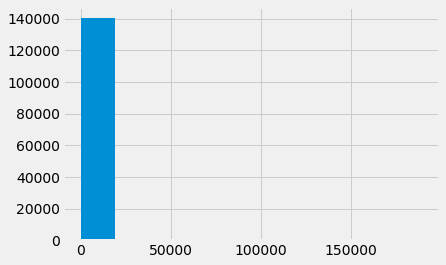

In [88]:
plt.hist(df.favorite_count)

(array([1.40334e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0. ,  18936.1,  37872.2,  56808.3,  75744.4,  94680.5,
        113616.6, 132552.7, 151488.8, 170424.9, 189361. ]),
 <a list of 10 Patch objects>)

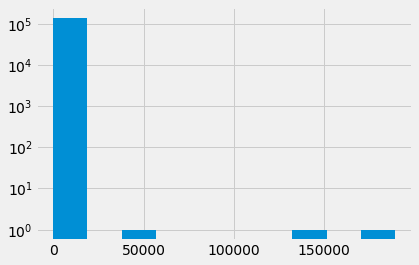

In [89]:
plt.hist(df.favorite_count, log=True)

In [90]:
# favorite_count has 140,337 not null entries
df.favorite_count.notnull().sum()

140337

In [91]:
# favorite_count has 0 null entries
df.favorite_count.isna().sum()

0

### favorited

In [92]:
df.favorited.iloc[0]

False

In [93]:
df.favorited.value_counts()

False    140337
Name: favorited, dtype: int64

In [94]:
# favorited has 140,337 non-null entries
df.favorited.notnull().sum()

140337

In [95]:
# favorited has 0 null entries
df.favorited.isna().sum()

0

### retweeted

In [96]:
df.retweeted.iloc[0]

False

In [97]:
df.retweeted.value_counts()

False    140337
Name: retweeted, dtype: int64

In [98]:
# retweeted has 140,337 non-null entries
df.retweeted.notnull().sum()

140337

In [99]:
# retweeted has 0 null entries
df.retweeted.isna().sum()

0

### *possibly_sensitive

In [100]:
df.possibly_sensitive[df.possibly_sensitive.notnull()]

0         False
2         False
7         False
10        False
14        False
          ...  
140326    False
140328    False
140330    False
140332    False
140334    False
Name: possibly_sensitive, Length: 32333, dtype: object

In [101]:
df.possibly_sensitive.value_counts()

False    30897
True      1436
Name: possibly_sensitive, dtype: int64

In [102]:
# possibly_sensitive has 32,333 non-null entries
df.possibly_sensitive.notnull().sum()

32333

In [103]:
# possibly_sensitive has108,004 null entries
df.possibly_sensitive.isna().sum()

108004

### *lang

In [104]:
df.lang.iloc[0]

'en'

In [105]:
df.lang.value_counts()

en     124030
und      9322
es       2900
pt       1034
fr        665
de        304
in        241
tr        234
ja        228
it        209
nl        165
tl        160
zh         84
th         76
eu         72
pl         68
da         62
ar         49
et         46
ht         46
sv         42
fa         40
hi         39
no         37
ca         33
am         21
fi         16
ro         16
ru         12
ko         11
cs         11
cy          9
el          9
hu          8
vi          5
lt          5
iw          4
ta          4
sl          3
ur          3
pa          3
my          2
uk          2
ml          2
lv          1
hy          1
te          1
gu          1
is          1
Name: lang, dtype: int64

In [106]:
# lang has 140,337 non-null entries
df.lang.notnull().sum()

140337

In [107]:
# lang has 0 null entries
df.lang.isna().sum()

0

### *retweeted_status (may want to use for separate modeling)

In [108]:
df.retweeted_status[df.retweeted_status.notnull()]

1         {'created_at': 'Tue Sep 29 23:55:42 +0000 2020...
3         {'created_at': 'Tue Sep 29 23:00:28 +0000 2020...
4         {'created_at': 'Tue Sep 29 19:07:59 +0000 2020...
5         {'created_at': 'Tue Sep 29 23:35:01 +0000 2020...
6         {'created_at': 'Tue Sep 29 17:33:06 +0000 2020...
                                ...                        
140330    {'created_at': 'Fri Oct 02 23:48:43 +0000 2020...
140331    {'created_at': 'Fri Oct 02 21:42:08 +0000 2020...
140332    {'created_at': 'Fri Oct 02 22:31:56 +0000 2020...
140335    {'created_at': 'Fri Oct 02 23:58:26 +0000 2020...
140336    {'created_at': 'Fri Oct 02 23:54:45 +0000 2020...
Name: retweeted_status, Length: 106900, dtype: object

In [109]:
df.retweeted_status.iloc[1]

{'created_at': 'Tue Sep 29 23:55:42 +0000 2020',
 'id': 1311092317466624005,
 'id_str': '1311092317466624005',
 'full_text': '#PresidentialDebate #Debates2020 #TrumpIsANationalDisgrace https://t.co/GOhLaDJLeN',
 'truncated': False,
 'display_text_range': [0, 58],
 'entities': {'hashtags': [{'text': 'PresidentialDebate', 'indices': [0, 19]},
   {'text': 'Debates2020', 'indices': [20, 32]},
   {'text': 'TrumpIsANationalDisgrace', 'indices': [33, 58]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/GOhLaDJLeN',
    'expanded_url': 'https://twitter.com/JenniferJJacobs/status/1311068232976080896',
    'display_url': 'twitter.com/JenniferJJacob…',
    'indices': [59, 82]}]},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 10842348928404

In [110]:
# retweeted_status has 106,900 non-null entries
df.retweeted_status.notnull().sum()

106900

In [111]:
# retweeted_status has 33,437 non-null entries
df.retweeted_status.isna().sum()

33437

### *extended_entities (may want to use for separate modeling)

In [112]:
df.extended_entities[df.extended_entities.notnull()]

2         {'media': [{'id': 1310969778111217665, 'id_str...
7         {'media': [{'id': 1310422596324913152, 'id_str...
15        {'media': [{'id': 1311010866310066177, 'id_str...
58        {'media': [{'id': 1311093825117577216, 'id_str...
71        {'media': [{'id': 1311082517756342276, 'id_str...
                                ...                        
140312    {'media': [{'id': 1312158363715764225, 'id_str...
140313    {'media': [{'id': 1312118882556051459, 'id_str...
140326    {'media': [{'id': 1312180308599398400, 'id_str...
140328    {'media': [{'id': 1312038913842634758, 'id_str...
140332    {'media': [{'id': 1312158363715764225, 'id_str...
Name: extended_entities, Length: 14628, dtype: object

In [113]:
df.extended_entities.iloc[2]

{'media': [{'id': 1310969778111217665,
   'id_str': '1310969778111217665',
   'indices': [281, 304],
   'media_url': 'http://pbs.twimg.com/media/EjGDCRVXYAMRXDI.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EjGDCRVXYAMRXDI.jpg',
   'url': 'https://t.co/DKU4ausBzT',
   'display_url': 'pic.twitter.com/DKU4ausBzT',
   'expanded_url': 'https://twitter.com/Varneyco/status/1311093401652277252/video/1',
   'type': 'video',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 1200, 'h': 675, 'resize': 'fit'},
    'small': {'w': 680, 'h': 383, 'resize': 'fit'},
    'large': {'w': 1280, 'h': 720, 'resize': 'fit'}},
   'video_info': {'aspect_ratio': [16, 9],
    'duration_millis': 60161,
    'variants': [{'content_type': 'application/x-mpegURL',
      'url': 'https://video.twimg.com/amplify_video/1310969778111217665/pl/L83AeKfdPkuE5d3A.m3u8?tag=13'},
     {'bitrate': 2176000,
      'content_type': 'video/mp4',
      'url': 'https://video.twimg.com/amplify_v

In [114]:
# extended_entities has 14,628 non-null entries
df.extended_entities.notnull().sum()

14628

In [115]:
# extended_entities has 127,709 non-null entries
df.extended_entities.isna().sum()

125709

### withheld_in_countries

In [116]:
df.withheld_in_countries[df.withheld_in_countries.notnull()]

1070      [DE, FR]
23089         [DE]
25972         [DE]
31451         [IN]
37604         [DE]
37901         [DE]
42782         [DE]
74789         [DE]
75440         [DE]
75727     [DE, FR]
76080         [DE]
76210         [DE]
81795         [DE]
87699         [DE]
88029     [DE, FR]
88072         [DE]
89673         [DE]
90186         [DE]
91432         [DE]
92184         [DE]
93942         [DE]
94063         [DE]
96151         [DE]
100703        [DE]
106582    [DE, FR]
108257        [IN]
108536        [TR]
109209    [DE, FR]
119001    [DE, FR]
119658        [DE]
124428        [DE]
128329        [DE]
129380    [DE, FR]
130876    [DE, FR]
135105    [DE, FR]
136603    [DE, FR]
Name: withheld_in_countries, dtype: object

In [117]:
# withheld_in_countries has 36 non-null entries
df.withheld_in_countries.notnull().sum()

36

In [118]:
# withheld_in_countries has 140,301 null entries
df.withheld_in_countries.isna().sum()

140301